##Multi Label Classification  1

The below model classifies animal images into 3 categories which are 'cat','dog'and 'horse'

In [0]:
from zipfile import ZipFile

file_name = "Transfer_train.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image

In [0]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '
W0703 16:11:12.869778 140439936460672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 16:11:12.915759 140439936460672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 16:11:12.940255 140439936460672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.un

17227776/17225924 [==============================] - 1s 0us/step


In [0]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [0]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [0]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [0]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 197 images belonging to 3 classes.


In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

W0703 16:12:07.893198 140439936460672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

W0703 16:12:11.290940 140439936460672 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
6/6 [==============================] - 44s 7s/step - loss: 0.8887 - acc: 0.6823
Epoch 2/10
6/6 [==============================] - 35s 6s/step - loss: 0.1445 - acc: 0.9414
Epoch 3/10
6/6 [==============================] - 35s 6s/step - loss: 0.1202 - acc: 0.9733
Epoch 4/10
6/6 [==============================] - 35s 6s/step - loss: 0.0412 - acc: 0.9787
Epoch 5/10
6/6 [==============================] - 35s 6s/step - loss: 0.0238 - acc: 0.9893
Epoch 6/10
6/6 [==============================] - 35s 6s/step - loss: 0.3427 - acc: 0.9706
Epoch 7/10
6/6 [==============================] - 34s 6s/step - loss: 0.9072 - acc: 0.8827
Epoch 8/10
6/6 [==============================] - 40s 7s/step - loss: 0.3474 - acc: 0.9531
Epoch 9/10
6/6 [==============================] - 35s 6s/step - loss: 0.2442 - acc: 0.9147
Epoch 10/10
6/6 [==============================] - 34s 6s/step - loss: 0.6372 - acc: 0.9091


In [0]:
import matplotlib.pyplot as plt
import numpy as np
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [0]:
img_path = 'C1.jpg'
new_image = load_image(img_path)
pred = model.predict(new_image)
print(pred)

[[0.45649108 0.54245067 0.0010583 ]]


##Multi Label Classification 2

The below model classifies nature iamges into five categories which are 'desert','mountain','sea','sunset' and 'trees'.

In [0]:
import pandas as pd
import numpy as np
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential

In [0]:
from zipfile import ZipFile

file_name = "miml_dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
df1=pd.read_csv('miml_dataset/miml_labels_1.csv')
df1.sample(5)

,Filenames,desert,mountains,sea,sunset,trees
1472,1473.jpg,0,0,0,1,0
1808,1809.jpg,0,0,0,0,1
18,19.jpg,1,0,0,0,0
1008,1009.jpg,0,0,1,0,0
1935,1936.jpg,0,0,0,0,1


In [0]:
columns=["desert", "mountains", "sea", "sunset", "trees"]
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [0]:
train_generator=datagen.flow_from_dataframe(
dataframe=df1[:1800],
directory="miml_dataset/images",
x_col="Filenames",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="other",
target_size=(100,100))

valid_generator=test_datagen.flow_from_dataframe(
dataframe=df1[1800:1900],
directory="miml_dataset/images",
x_col="Filenames",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="other",
target_size=(100,100))

test_generator=test_datagen.flow_from_dataframe(
dataframe=df1[1900:],
directory="miml_dataset/images",
x_col="Filenames",
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(100,100))

Found 1800 validated image filenames.
Found 100 validated image filenames.
Found 100 validated image filenames.


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))

W0705 04:31:21.774102 139858878379904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 04:31:21.826185 139858878379904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 04:31:21.834131 139858878379904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 04:31:21.889906 139858878379904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0705 04:31:21.894722 139858878379904 deprecation_wrapp

In [0]:
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

W0705 04:33:19.576617 139858878379904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 04:33:19.583973 139858878379904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0705 04:33:19.695629 139858878379904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
56/56 [==============================] - 95s 2s/step - loss: 0.5261 - acc: 0.7571 - val_loss: 0.5485 - val_acc: 0.7667
Epoch 2/10
56/56 [==============================] - 91s 2s/step - loss: 0.4370 - acc: 0.7993 - val_loss: 0.4626 - val_acc: 0.8353
Epoch 3/10
56/56 [==============================] - 91s 2s/step - loss: 0.3974 - acc: 0.8230 - val_loss: 0.3598 - val_acc: 0.8647
Epoch 4/10
56/56 [==============================] - 92s 2s/step - loss: 0.3758 - acc: 0.8344 - val_loss: 0.3325 - val_acc: 0.8500
Epoch 5/10
56/56 [==============================] - 92s 2s/step - loss: 0.3657 - acc: 0.8419 - val_loss: 0.2963 - val_acc: 0.8750
Epoch 6/10
56/56 [==============================] - 92s 2s/step - loss: 0.3495 - acc: 0.8486 - val_loss: 0.2521 - val_acc: 0.8676
Epoch 7/10
56/56 [==============================] - 93s 2s/step - loss: 0.3315 - acc: 0.8574 - val_loss: 0.1736 - val_acc: 0.9235
Epoch 8/10
56/56 [==============================] - 93s 2s/step - loss: 0.3350 - acc: 0.85

In [0]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

100/100 [==============================] - 2s 23ms/step


In [0]:
#Output in format 1

pred_bool = (pred >0.5)
predictions = pred_bool.astype(int)
columns=["desert", "mountains", "sea", "sunset", "trees"]
#columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=columns)
results["Filenames"]=test_generator.filenames
ordered_cols=["Filenames"]+columns
results=results[ordered_cols]#To get the same column order

In [0]:
results

,Filenames,desert,mountains,sea,sunset,trees
0,1901.jpg,0,0,1,0,1
1,1902.jpg,0,0,1,0,0
2,1903.jpg,0,0,0,0,1
3,1904.jpg,0,0,1,0,0
4,1905.jpg,0,0,0,0,1
5,1906.jpg,0,0,0,0,1
6,1907.jpg,0,0,1,0,0
7,1908.jpg,0,0,0,0,1
8,1909.jpg,1,0,0,0,1
9,1910.jpg,0,0,0,0,1


## Intel Image Classification Problem

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"writammallik","key":"07f5bc8f4412aba2f960d3ff6bc6e011"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 337M/344M [00:06<00:00, 47.9MB/s]
100% 344M/344M [00:06<00:00, 51.5MB/s]


In [0]:
from zipfile import ZipFile

file_name = "intel-image-classification.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
from zipfile import ZipFile

file_name = "seg_pred.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
from zipfile import ZipFile

file_name = "seg_train.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
from zipfile import ZipFile

file_name = "seg_test.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [0]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label == 5
        elif labels == 'mountain':
            label == 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

In [0]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [0]:
Images, Labels = get_images('seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [0]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


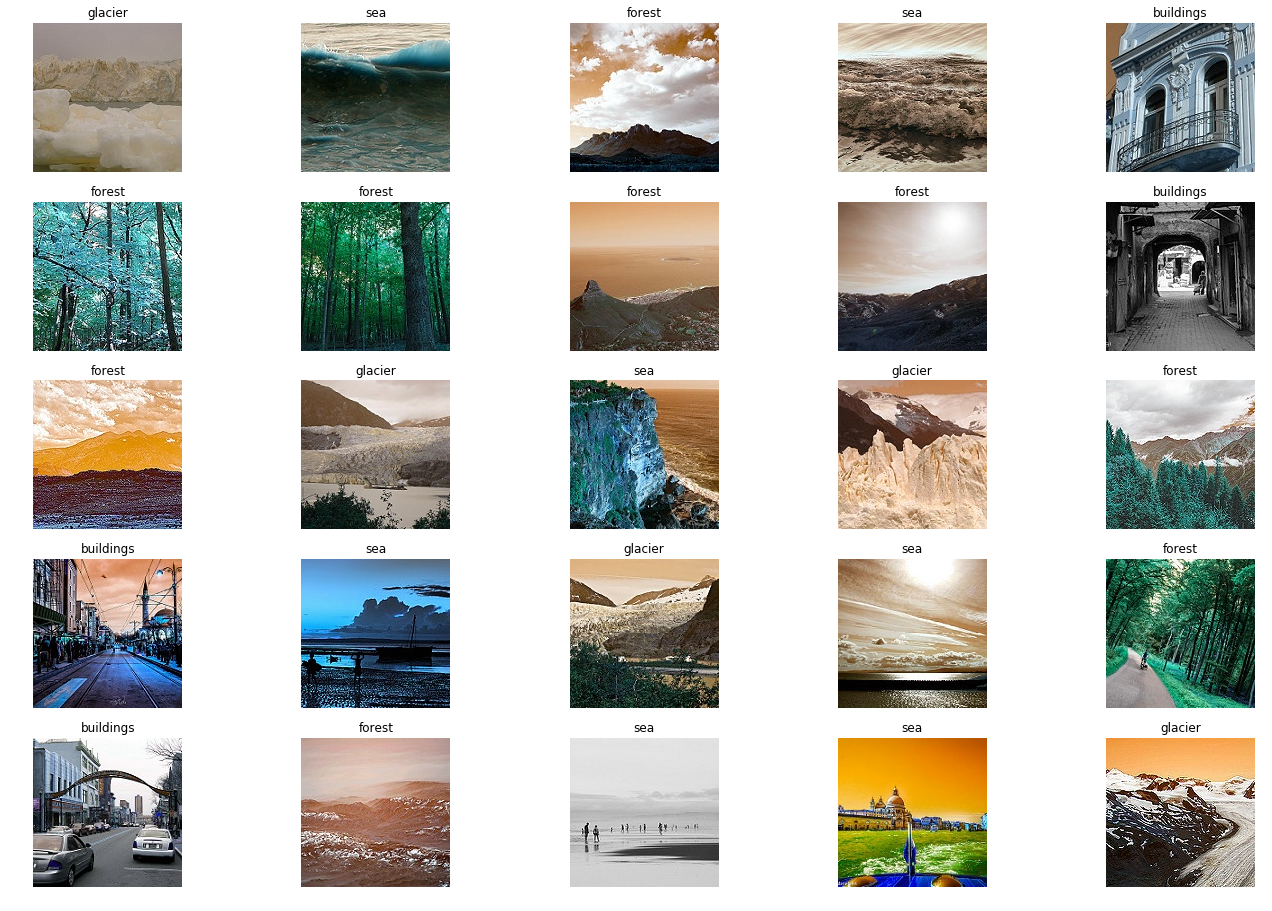

In [0]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [0]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 50)        4

In [0]:
model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/35
9823/9823 [==============================] - 189s 19ms/sample - loss: 0.9028 - acc: 0.6564 - val_loss: 0.6014 - val_acc: 0.7756
Epoch 2/35
9823/9823 [==============================] - 184s 19ms/sample - loss: 0.7316 - acc: 0.7294 - val_loss: 0.5467 - val_acc: 0.8015
Epoch 3/35
9823/9823 [==============================] - 184s 19ms/sample - loss: 0.6538 - acc: 0.7616 - val_loss: 0.4559 - val_acc: 0.8407
Epoch 4/35
9823/9823 [==============================] - 184s 19ms/sample - loss: 0.5780 - acc: 0.7955 - val_loss: 0.4533 - val_acc: 0.8445
Epoch 5/35
9823/9823 [==============================] - 184s 19ms/sample - loss: 0.5361 - acc: 0.8153 - val_loss: 0.3826 - val_acc: 0.8680
Epoch 6/35
9823/9823 [==============================] - 184s 19ms/sample - loss: 0.5023 - acc: 0.8249 - val_loss: 0.3975 - val_acc: 0.8677
Epoch 7/35
9823/9823 [==============================] - 184s 19ms/sample - loss: 0.4536 - acc: 0.8474 - val_loss: 0.35

In [0]:
model.save('Intel_Image_Classification.h5')

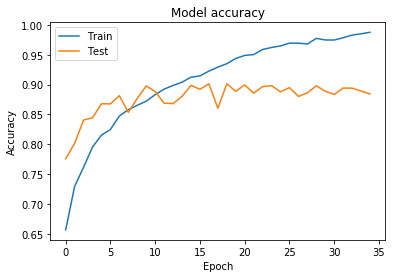

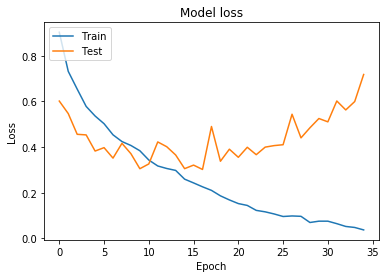

In [0]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [0]:
test_images,test_labels = get_images('seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3000/3000 [==============================] - 17s 6ms/sample - loss: 0.7830 - acc: 0.8770


[0.783028019785881, 0.877]

In [0]:
pred_images = get_imagesp('seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

In [0]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()